In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
data = pd.read_csv('data/uncleaned_data.csv')
data

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,5d67182220bfca28bcbb9c9860ed434d,2023-03-21,2023-05-04,LAX,ORD,GA14NR,PT9H59M,1,False,False,...,1683241080||1683266040,2023-05-04T17:58:00.000-05:00||2023-05-05T00:5...,DFW||ORD,LAX||DFW,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||,10980||9240,None||None,coach||coach
1,de12e543e471c3346b549e3e35b817ef,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H3M,0,False,False,...,1683253440,2023-05-04T21:24:00.000-05:00,ORD,LAX,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,14580,None,coach
2,ece4b5f0646f35b85ccc76ac5c428b2f,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H4M,0,False,False,...,1683223440,2023-05-04T13:04:00.000-05:00,ORD,LAX,Spirit Airlines,NK,NaN,14640,None,coach
3,010dee66a72ec0982df3dfe7b668b123,2023-03-21,2023-05-04,LAX,ORD,GNR,PT5H48M,1,False,False,...,1683261900||1683277980,2023-05-04T21:45:00.000-07:00||2023-05-05T04:1...,LAS||ORD,LAX||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4800||12780,None||None,coach||coach
4,697b5a7b63d1fb5ccc4e9a4acd392190,2023-03-21,2023-05-04,LAX,ORD,GNR,PT6H48M,1,False,False,...,1683258300||1683277980,2023-05-04T20:45:00.000-07:00||2023-05-05T04:1...,LAS||ORD,LAX||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4800||12780,None||None,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,5ff21d418b358525f366939f5e5406b0,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H47M,0,False,False,...,1683998100||1684011900,2023-05-13T13:15:00.000-04:00||2023-05-13T16:0...,DCA||ORD,ATL||DCA,American Airlines||American Airlines,AA||AA,Canadian Regional Jet 700||Boeing 737-800,7020||7800,541||594,coach||coach
88890,70eed48f5ee49d0e78ea1e80f876aa6d,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H51M,0,False,False,...,1684004040||1684016100,2023-05-13T13:54:00.000-05:00||2023-05-13T17:1...,DFW||ORD,ATL||DFW,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,9000||8400,725||799,coach||coach
88891,55ea076abe9009ae4cd4b49c34c5adc6,2023-03-21,2023-05-13,ATL,ORD,WI7AUEL1,PT7H7M,0,False,False,...,1684000800||1684018140,2023-05-13T14:00:00.000-04:00||2023-05-13T17:4...,JFK||ORD,ATL||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8280||10680,761||731,coach||coach
88892,3bb0ffa8d460ad297228a7725b759645,2023-03-21,2023-05-13,ATL,ORD,KAUTA5MG,PT2H14M,0,False,False,...,1684022340,2023-05-13T18:59:00.000-05:00,ORD,ATL,Delta,DL,Boeing 757,8040,600,coach


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88894 entries, 0 to 88893
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   legId                              88894 non-null  object 
 1   searchDate                         88894 non-null  object 
 2   flightDate                         88894 non-null  object 
 3   startingAirport                    88894 non-null  object 
 4   destinationAirport                 88894 non-null  object 
 5   fareBasisCode                      88894 non-null  object 
 6   travelDuration                     88894 non-null  object 
 7   elapsedDays                        88894 non-null  int64  
 8   isBasicEconomy                     88894 non-null  bool   
 9   isRefundable                       88894 non-null  bool   
 10  isNonStop                          88894 non-null  bool   
 11  baseFare                           88894 non-null  flo

In [30]:
data.describe()

,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,88894.000000,88894.000000,88894.000000,88894.000000,78310.000000
mean,0.154690,255.575434,302.666814,6.098983,1663.565458
std,0.361611,164.039183,173.132463,3.060874,719.041601
min,0.000000,0.010000,26.890000,0.000000,572.000000
25%,0.000000,133.950000,168.910000,4.000000,1068.000000
50%,0.000000,226.980000,267.700000,7.000000,1553.000000
75%,0.000000,356.280000,406.700000,9.000000,2169.000000
max,1.000000,3879.070000,4194.200000,9.000000,4162.000000


In [31]:
data.isna().sum()

legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  10584
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEqu

In [32]:
# Fill na for segmentsEquipmentDescription by '||', still meaning that the related data is missing, but in a standard format
data['segmentsEquipmentDescription'] = data['segmentsEquipmentDescription'].fillna('||')
data.isna().sum()

legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  10584
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEqu

In [33]:
from datetime import datetime


def change_iso_time(iso_string):
    datetime_obj = datetime.fromisoformat(iso_string)
    standard_time = datetime_obj.strftime("%Y-%m-%d %H:%M:%S")
    return standard_time

In [34]:
def change_duration(duration):
    hours = 0
    minutes = 0
    if 'H' in duration:
        hours_index = duration.index('H')
        hours = int(duration[2:hours_index])
    if 'M' in duration:
        minutes_index = duration.index('M')
        if 'H' in duration:
            hours_index = duration.index('H')
            minutes = int(duration[hours_index + 1:minutes_index])
        else:
            minutes = int(duration[2:minutes_index])
    total_hours = hours + minutes / 60
    return total_hours

In [109]:
data['route_1'] = data['segmentsDepartureAirportCode'] + ',' + data['segmentsArrivalAirportCode']

In [110]:
def change_route(input_string):
    substrings = input_string.split(',')
    depart = substrings[0].split('||')
    arrival = substrings[1].split('||')
    stops = len(depart) - 1
    routes = ""
    for i in range(len(depart)):
        routes += depart[i] + '->'
    routes = routes + arrival[-1]
    return stops, routes

In [111]:
data['stops'] = data['route_1'].apply(lambda x: change_route(x)[0])
data['route'] = data['route_1'].apply(lambda x: change_route(x)[1])

In [112]:
data['travelDuration_h'] = data['travelDuration'].apply(lambda x: change_duration(x))

In [113]:
data

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,route_1,stops,route,travelDuration_h
0,5d67182220bfca28bcbb9c9860ed434d,2023-03-21,2023-05-04,LAX,ORD,GA14NR,PT9H59M,1,False,False,...,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||,10980||9240,None||None,coach||coach,"LAX||DFW,DFW||ORD",1,LAX->DFW->ORD,9.983333
1,de12e543e471c3346b549e3e35b817ef,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H3M,0,False,False,...,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,14580,None,coach,"LAX,ORD",0,LAX->ORD,4.050000
2,ece4b5f0646f35b85ccc76ac5c428b2f,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H4M,0,False,False,...,Spirit Airlines,NK,||,14640,None,coach,"LAX,ORD",0,LAX->ORD,4.066667
3,010dee66a72ec0982df3dfe7b668b123,2023-03-21,2023-05-04,LAX,ORD,GNR,PT5H48M,1,False,False,...,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4800||12780,None||None,coach||coach,"LAX||LAS,LAS||ORD",1,LAX->LAS->ORD,5.800000
4,697b5a7b63d1fb5ccc4e9a4acd392190,2023-03-21,2023-05-04,LAX,ORD,GNR,PT6H48M,1,False,False,...,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4800||12780,None||None,coach||coach,"LAX||LAS,LAS||ORD",1,LAX->LAS->ORD,6.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,5ff21d418b358525f366939f5e5406b0,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H47M,0,False,False,...,American Airlines||American Airlines,AA||AA,Canadian Regional Jet 700||Boeing 737-800,7020||7800,541||594,coach||coach,"ATL||DCA,DCA||ORD",1,ATL->DCA->ORD,5.783333
88890,70eed48f5ee49d0e78ea1e80f876aa6d,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H51M,0,False,False,...,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,9000||8400,725||799,coach||coach,"ATL||DFW,DFW||ORD",1,ATL->DFW->ORD,5.850000
88891,55ea076abe9009ae4cd4b49c34c5adc6,2023-03-21,2023-05-13,ATL,ORD,WI7AUEL1,PT7H7M,0,False,False,...,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8280||10680,761||731,coach||coach,"ATL||JFK,JFK||ORD",1,ATL->JFK->ORD,7.116667
88892,3bb0ffa8d460ad297228a7725b759645,2023-03-21,2023-05-13,ATL,ORD,KAUTA5MG,PT2H14M,0,False,False,...,Delta,DL,Boeing 757,8040,600,coach,"ATL,ORD",0,ATL->ORD,2.233333


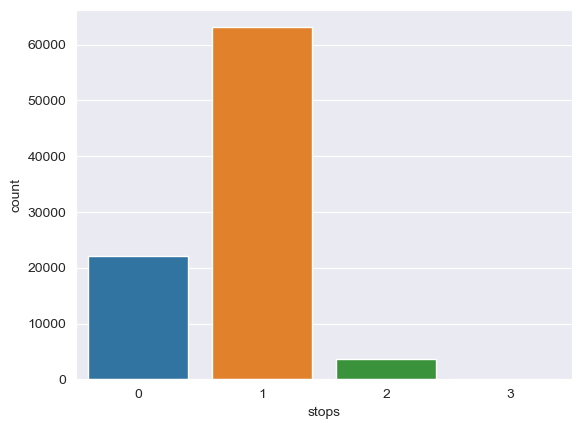

In [114]:
sns.countplot(data=data, x=data.stops)
plt.show()

In [115]:
len(data[data['stops'] == 3].index) / len(data.index)

0.0011811820820302832

We shall drop the flight ticket with 3 stops, since there are less data to learn.

In [116]:
data1 = data.drop(data[data['stops'] == 3].index)
data1.reset_index(drop=True)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,route_1,stops,route,travelDuration_h
0,5d67182220bfca28bcbb9c9860ed434d,2023-03-21,2023-05-04,LAX,ORD,GA14NR,PT9H59M,1,False,False,...,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||,10980||9240,None||None,coach||coach,"LAX||DFW,DFW||ORD",1,LAX->DFW->ORD,9.983333
1,de12e543e471c3346b549e3e35b817ef,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H3M,0,False,False,...,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,14580,None,coach,"LAX,ORD",0,LAX->ORD,4.050000
2,ece4b5f0646f35b85ccc76ac5c428b2f,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H4M,0,False,False,...,Spirit Airlines,NK,||,14640,None,coach,"LAX,ORD",0,LAX->ORD,4.066667
3,010dee66a72ec0982df3dfe7b668b123,2023-03-21,2023-05-04,LAX,ORD,GNR,PT5H48M,1,False,False,...,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4800||12780,None||None,coach||coach,"LAX||LAS,LAS||ORD",1,LAX->LAS->ORD,5.800000
4,697b5a7b63d1fb5ccc4e9a4acd392190,2023-03-21,2023-05-04,LAX,ORD,GNR,PT6H48M,1,False,False,...,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4800||12780,None||None,coach||coach,"LAX||LAS,LAS||ORD",1,LAX->LAS->ORD,6.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88784,5ff21d418b358525f366939f5e5406b0,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H47M,0,False,False,...,American Airlines||American Airlines,AA||AA,Canadian Regional Jet 700||Boeing 737-800,7020||7800,541||594,coach||coach,"ATL||DCA,DCA||ORD",1,ATL->DCA->ORD,5.783333
88785,70eed48f5ee49d0e78ea1e80f876aa6d,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H51M,0,False,False,...,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,9000||8400,725||799,coach||coach,"ATL||DFW,DFW||ORD",1,ATL->DFW->ORD,5.850000
88786,55ea076abe9009ae4cd4b49c34c5adc6,2023-03-21,2023-05-13,ATL,ORD,WI7AUEL1,PT7H7M,0,False,False,...,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8280||10680,761||731,coach||coach,"ATL||JFK,JFK||ORD",1,ATL->JFK->ORD,7.116667
88787,3bb0ffa8d460ad297228a7725b759645,2023-03-21,2023-05-13,ATL,ORD,KAUTA5MG,PT2H14M,0,False,False,...,Delta,DL,Boeing 757,8040,600,coach,"ATL,ORD",0,ATL->ORD,2.233333


Each trip info: trip_info1 = (depart_time,arrive_time,duration_h,distance,airline,airline_code,cabin,equipment)

In [117]:
data1['trip_info'] = data1['segmentsDepartureTimeRaw'] + ',' + data1['segmentsArrivalTimeRaw'] + ',' + data1[
    'segmentsDurationInSeconds'] + ',' + data1['segmentsDistance'] + ',' + data1['segmentsAirlineName'] + ',' + data1[
                         'segmentsAirlineCode'] + ',' + data1['segmentsCabinCode'] + ',' + data1[
                         'segmentsEquipmentDescription']

In [118]:
def change_trip_info(info_str):
    info_list = info_str.split(',')
    container = []
    for i in range(len(info_list)):
        container.append(info_list[i].split('||'))
    info = list(
        zip([change_iso_time(i) for i in container[0]], [change_iso_time(i) for i in container[1]],
            [np.round(float(i) / 3600, 2) for i in container[2]],
            container[3], container[4], container[5], container[6], container[7]))
    return info

In [120]:
data1['all_trip_info'] = data1['trip_info'].apply(lambda x: change_trip_info(x))

In [121]:
data1['first_trip_info'] = data1['all_trip_info'].apply(lambda x: x[0])
data1['second_trip_info'] = data1['all_trip_info'].apply(lambda x: x[1] if len(x) >= 2 else None)
data1['third_trip_info'] = data1['all_trip_info'].apply(lambda x: x[2] if len(x) >= 3 else None)
data1

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsCabinCode,route_1,stops,route,travelDuration_h,trip_info,all_trip_info,first_trip_info,second_trip_info,third_trip_info
0,5d67182220bfca28bcbb9c9860ed434d,2023-03-21,2023-05-04,LAX,ORD,GA14NR,PT9H59M,1,False,False,...,coach||coach,"LAX||DFW,DFW||ORD",1,LAX->DFW->ORD,9.983333,2023-05-04T12:55:00.000-07:00||2023-05-04T22:2...,"[(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3....","(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3.0...","(2023-05-04 22:20:00, 2023-05-05 00:54:00, 2.5...",None
1,de12e543e471c3346b549e3e35b817ef,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H3M,0,False,False,...,coach,"LAX,ORD",0,LAX->ORD,4.050000,"2023-05-04T15:21:00.000-07:00,2023-05-04T21:24...","[(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4....","(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4.0...",None,None
2,ece4b5f0646f35b85ccc76ac5c428b2f,2023-03-21,2023-05-04,LAX,ORD,UA21NR,PT4H4M,0,False,False,...,coach,"LAX,ORD",0,LAX->ORD,4.066667,"2023-05-04T07:00:00.000-07:00,2023-05-04T13:04...","[(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4....","(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4.0...",None,None
3,010dee66a72ec0982df3dfe7b668b123,2023-03-21,2023-05-04,LAX,ORD,GNR,PT5H48M,1,False,False,...,coach||coach,"LAX||LAS,LAS||ORD",1,LAX->LAS->ORD,5.800000,2023-05-04T20:25:00.000-07:00||2023-05-04T22:4...,"[(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1....","(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None
4,697b5a7b63d1fb5ccc4e9a4acd392190,2023-03-21,2023-05-04,LAX,ORD,GNR,PT6H48M,1,False,False,...,coach||coach,"LAX||LAS,LAS||ORD",1,LAX->LAS->ORD,6.800000,2023-05-04T19:25:00.000-07:00||2023-05-04T22:4...,"[(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1....","(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,5ff21d418b358525f366939f5e5406b0,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H47M,0,False,False,...,coach||coach,"ATL||DCA,DCA||ORD",1,ATL->DCA->ORD,5.783333,2023-05-13T11:18:00.000-04:00||2023-05-13T14:5...,"[(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1....","(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1.9...","(2023-05-13 14:55:00, 2023-05-13 16:05:00, 2.1...",None
88890,70eed48f5ee49d0e78ea1e80f876aa6d,2023-03-21,2023-05-13,ATL,ORD,VVAHZNN1,PT5H51M,0,False,False,...,coach||coach,"ATL||DFW,DFW||ORD",1,ATL->DFW->ORD,5.850000,2023-05-13T12:24:00.000-04:00||2023-05-13T14:5...,"[(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2....","(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2.5...","(2023-05-13 14:55:00, 2023-05-13 17:15:00, 2.3...",None
88891,55ea076abe9009ae4cd4b49c34c5adc6,2023-03-21,2023-05-13,ATL,ORD,WI7AUEL1,PT7H7M,0,False,False,...,coach||coach,"ATL||JFK,JFK||ORD",1,ATL->JFK->ORD,7.116667,2023-05-13T11:42:00.000-04:00||2023-05-13T15:5...,"[(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2....","(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2.3...","(2023-05-13 15:51:00, 2023-05-13 17:49:00, 2.9...",None
88892,3bb0ffa8d460ad297228a7725b759645,2023-03-21,2023-05-13,ATL,ORD,KAUTA5MG,PT2H14M,0,False,False,...,coach,"ATL,ORD",0,ATL->ORD,2.233333,"2023-05-13T17:45:00.000-04:00,2023-05-13T18:59...","[(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2....","(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2.2...",None,None


In [123]:
print(data1.columns.tolist())

['legId', 'searchDate', 'flightDate', 'startingAirport', 'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare', 'seatsRemaining', 'totalTravelDistance', 'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode', 'route_1', 'stops', 'route', 'travelDuration_h', 'trip_info', 'all_trip_info', 'first_trip_info', 'second_trip_info', 'third_trip_info']


In [133]:
data_filtered = data1[
    ['searchDate', 'flightDate', 'startingAirport', 'destinationAirport', 'travelDuration_h', 'elapsedDays',
     'isBasicEconomy', 'isRefundable', 'isNonStop', 'seatsRemaining', 'totalTravelDistance', 'stops', 'route',
     'all_trip_info', 'first_trip_info', 'second_trip_info', 'third_trip_info', 'baseFare', 'totalFare']]

In [147]:
data_filtered

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,totalTravelDistance,stops,route,all_trip_info,first_trip_info,second_trip_info,third_trip_info,baseFare,totalFare
0,2023-03-21,2023-05-04,LAX,ORD,9.983333,1,False,False,False,0,NaN,1,LAX->DFW->ORD,"[(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3....","(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3.0...","(2023-05-04 22:20:00, 2023-05-05 00:54:00, 2.5...",None,21.11,91.29
1,2023-03-21,2023-05-04,LAX,ORD,4.050000,0,False,False,True,0,NaN,0,LAX->ORD,"[(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4....","(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4.0...",None,None,43.00,99.89
2,2023-03-21,2023-05-04,LAX,ORD,4.066667,0,False,False,True,0,NaN,0,LAX->ORD,"[(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4....","(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4.0...",None,None,43.00,99.89
3,2023-03-21,2023-05-04,LAX,ORD,5.800000,1,False,False,False,0,NaN,1,LAX->LAS->ORD,"[(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1....","(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18
4,2023-03-21,2023-05-04,LAX,ORD,6.800000,1,False,False,False,0,NaN,1,LAX->LAS->ORD,"[(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1....","(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,2023-03-21,2023-05-13,ATL,ORD,5.783333,0,False,False,False,7,1135.0,1,ATL->DCA->ORD,"[(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1....","(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1.9...","(2023-05-13 14:55:00, 2023-05-13 16:05:00, 2.1...",None,175.81,213.20
88890,2023-03-21,2023-05-13,ATL,ORD,5.850000,0,False,False,False,7,1524.0,1,ATL->DFW->ORD,"[(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2....","(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2.5...","(2023-05-13 14:55:00, 2023-05-13 17:15:00, 2.3...",None,175.81,213.20
88891,2023-03-21,2023-05-13,ATL,ORD,7.116667,0,False,False,False,7,1492.0,1,ATL->JFK->ORD,"[(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2....","(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2.3...","(2023-05-13 15:51:00, 2023-05-13 17:49:00, 2.9...",None,202.79,242.20
88892,2023-03-21,2023-05-13,ATL,ORD,2.233333,0,False,False,True,9,600.0,0,ATL->ORD,"[(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2....","(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2.2...",None,None,226.98,258.90


In [156]:
def get_waiting_time(x):
    time_interval = []
    for i in x:
        time_interval.append(i[0])
        time_interval.append(i[1])
    time_interval = time_interval[1:-1]
    if len(time_interval) == 0:
        waiting_time = 0
    else:
        k = len(time_interval) // 2
        result = [pd.to_datetime(time_interval[2 * i + 1]) - pd.to_datetime(time_interval[2 * i]) for i in range(k)]
        waiting_time = np.round(np.sum(result).total_seconds() / 3600, 2)
    return waiting_time

In [157]:
data_filtered['total_waiting_time'] = data_filtered['all_trip_info'].apply(lambda x: get_waiting_time(x))

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/2645906531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['total_waiting_time'] = data_filtered['all_trip_info'].apply(lambda x:get_waiting_time(x))


In [158]:
data_filtered

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,totalTravelDistance,stops,route,all_trip_info,first_trip_info,second_trip_info,third_trip_info,baseFare,totalFare,total_waiting_time
0,2023-03-21,2023-05-04,LAX,ORD,9.983333,1,False,False,False,0,NaN,1,LAX->DFW->ORD,"[(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3....","(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3.0...","(2023-05-04 22:20:00, 2023-05-05 00:54:00, 2.5...",None,21.11,91.29,4.37
1,2023-03-21,2023-05-04,LAX,ORD,4.050000,0,False,False,True,0,NaN,0,LAX->ORD,"[(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4....","(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4.0...",None,None,43.00,99.89,0.00
2,2023-03-21,2023-05-04,LAX,ORD,4.066667,0,False,False,True,0,NaN,0,LAX->ORD,"[(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4....","(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4.0...",None,None,43.00,99.89,0.00
3,2023-03-21,2023-05-04,LAX,ORD,5.800000,1,False,False,False,0,NaN,1,LAX->LAS->ORD,"[(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1....","(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18,0.92
4,2023-03-21,2023-05-04,LAX,ORD,6.800000,1,False,False,False,0,NaN,1,LAX->LAS->ORD,"[(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1....","(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,2023-03-21,2023-05-13,ATL,ORD,5.783333,0,False,False,False,7,1135.0,1,ATL->DCA->ORD,"[(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1....","(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1.9...","(2023-05-13 14:55:00, 2023-05-13 16:05:00, 2.1...",None,175.81,213.20,1.67
88890,2023-03-21,2023-05-13,ATL,ORD,5.850000,0,False,False,False,7,1524.0,1,ATL->DFW->ORD,"[(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2....","(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2.5...","(2023-05-13 14:55:00, 2023-05-13 17:15:00, 2.3...",None,175.81,213.20,1.02
88891,2023-03-21,2023-05-13,ATL,ORD,7.116667,0,False,False,False,7,1492.0,1,ATL->JFK->ORD,"[(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2....","(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2.3...","(2023-05-13 15:51:00, 2023-05-13 17:49:00, 2.9...",None,202.79,242.20,1.85
88892,2023-03-21,2023-05-13,ATL,ORD,2.233333,0,False,False,True,9,600.0,0,ATL->ORD,"[(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2....","(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2.2...",None,None,226.98,258.90,0.00


In [191]:
def get_class(x):
    flight_class = ''
    indicator = ''
    for i in x:
        if i[6] != indicator:
            flight_class = flight_class + i[6] + '+'
            indicator = i[6]
    flight_class = flight_class[:-1]
    return flight_class


def get_airline(x):
    airline = ''
    indicator = ''
    for i in x:
        if i[5] != indicator:
            airline = airline + i[5] + '+'
            indicator = i[5]
    airline = airline[:-1]
    return airline

In [193]:
data_filtered['class'] = data_filtered['all_trip_info'].apply(lambda x: get_class(x))
data_filtered['airline'] = data_filtered['all_trip_info'].apply(lambda x: get_airline(x))

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/3225389640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['class'] = data_filtered['all_trip_info'].apply(lambda x:get_class(x))
/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/3225389640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['airline'] = data_filtered['all_trip_info'].apply(lambda x:get_airline(x))


In [189]:
data_filtered.groupby('class').count()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,totalTravelDistance,stops,route,all_trip_info,first_trip_info,second_trip_info,third_trip_info,baseFare,totalFare,total_waiting_time
class,,,,,,,,,,,,,,,,,,,,
business,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,4,0,8,8,8
coach,88595,88595,88595,88595,88595,88595,88595,88595,88595,88595,78011,88595,88595,88595,88595,66565,3619,88595,88595,88595
coach+first,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0,60,60,60
coach+first+coach,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
coach+premium coach,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,18,34,34,34
coach+premium coach+coach,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
first,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,8,0,25,25,25
first+coach,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,2,37,37,37
first+coach+first,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [194]:
data_filtered.groupby('airline').count()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,...,stops,route,all_trip_info,first_trip_info,second_trip_info,third_trip_info,baseFare,totalFare,total_waiting_time,class
airline,,,,,,,,,,,,,,,,,,,,,
9K+UA,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
9X+AA,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
AA,29422,29422,29422,29422,29422,29422,29422,29422,29422,29422,...,29422,29422,29422,29422,21369,108,29422,29422,29422,29422
AA+9X,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
AA+LF,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
AS,2652,2652,2652,2652,2652,2652,2652,2652,2652,2652,...,2652,2652,2652,2652,2545,4,2652,2652,2652,2652
AS+DL,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,0,48,48,48,48
AS+UA,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,0,49,49,49,49
B6,5865,5865,5865,5865,5865,5865,5865,5865,5865,5865,...,5865,5865,5865,5865,3042,1,5865,5865,5865,5865


In [195]:
data_filtered

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,...,route,all_trip_info,first_trip_info,second_trip_info,third_trip_info,baseFare,totalFare,total_waiting_time,class,airline
0,2023-03-21,2023-05-04,LAX,ORD,9.983333,1,False,False,False,0,...,LAX->DFW->ORD,"[(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3....","(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3.0...","(2023-05-04 22:20:00, 2023-05-05 00:54:00, 2.5...",None,21.11,91.29,4.37,coach,NK
1,2023-03-21,2023-05-04,LAX,ORD,4.050000,0,False,False,True,0,...,LAX->ORD,"[(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4....","(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4.0...",None,None,43.00,99.89,0.00,coach,NK
2,2023-03-21,2023-05-04,LAX,ORD,4.066667,0,False,False,True,0,...,LAX->ORD,"[(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4....","(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4.0...",None,None,43.00,99.89,0.00,coach,NK
3,2023-03-21,2023-05-04,LAX,ORD,5.800000,1,False,False,False,0,...,LAX->LAS->ORD,"[(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1....","(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18,0.92,coach,NK
4,2023-03-21,2023-05-04,LAX,ORD,6.800000,1,False,False,False,0,...,LAX->LAS->ORD,"[(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1....","(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18,1.92,coach,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,2023-03-21,2023-05-13,ATL,ORD,5.783333,0,False,False,False,7,...,ATL->DCA->ORD,"[(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1....","(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1.9...","(2023-05-13 14:55:00, 2023-05-13 16:05:00, 2.1...",None,175.81,213.20,1.67,coach,AA
88890,2023-03-21,2023-05-13,ATL,ORD,5.850000,0,False,False,False,7,...,ATL->DFW->ORD,"[(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2....","(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2.5...","(2023-05-13 14:55:00, 2023-05-13 17:15:00, 2.3...",None,175.81,213.20,1.02,coach,AA
88891,2023-03-21,2023-05-13,ATL,ORD,7.116667,0,False,False,False,7,...,ATL->JFK->ORD,"[(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2....","(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2.3...","(2023-05-13 15:51:00, 2023-05-13 17:49:00, 2.9...",None,202.79,242.20,1.85,coach,B6
88892,2023-03-21,2023-05-13,ATL,ORD,2.233333,0,False,False,True,9,...,ATL->ORD,"[(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2....","(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2.2...",None,None,226.98,258.90,0.00,coach,DL


In [219]:
data_filtered['searchDate'] = pd.to_datetime(data_filtered['searchDate'])
data_filtered['flightDate'] = pd.to_datetime(data_filtered['flightDate'])
data_filtered['days_to_depart'] = data_filtered['flightDate'] - data_filtered['searchDate']
data_filtered['days_to_depart'] = data_filtered['days_to_depart'].apply(lambda x: x.days)
# weekday, Monday is 0 and Sunday is 6
data_filtered['flight_day_of_week'] = data_filtered['flightDate'].apply(lambda x: x.weekday())


/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/2773777105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['searchDate'] = pd.to_datetime(data_filtered['searchDate'])
/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/2773777105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['flightDate'] = pd.to_datetime(data_filtered['flightDate'])
/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/2773777105.py:3: SettingWithCopyWarning: 
A

In [220]:
data_filtered

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,...,first_trip_info,second_trip_info,third_trip_info,baseFare,totalFare,total_waiting_time,class,airline,days_to_depart,flight_day_of_week
0,2023-03-21,2023-05-04,LAX,ORD,9.983333,1,False,False,False,0,...,"(2023-05-04 12:55:00, 2023-05-04 17:58:00, 3.0...","(2023-05-04 22:20:00, 2023-05-05 00:54:00, 2.5...",None,21.11,91.29,4.37,coach,NK,44,3
1,2023-03-21,2023-05-04,LAX,ORD,4.050000,0,False,False,True,0,...,"(2023-05-04 15:21:00, 2023-05-04 21:24:00, 4.0...",None,None,43.00,99.89,0.00,coach,NK,44,3
2,2023-03-21,2023-05-04,LAX,ORD,4.066667,0,False,False,True,0,...,"(2023-05-04 07:00:00, 2023-05-04 13:04:00, 4.0...",None,None,43.00,99.89,0.00,coach,NK,44,3
3,2023-03-21,2023-05-04,LAX,ORD,5.800000,1,False,False,False,0,...,"(2023-05-04 20:25:00, 2023-05-04 21:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18,0.92,coach,NK,44,3
4,2023-03-21,2023-05-04,LAX,ORD,6.800000,1,False,False,False,0,...,"(2023-05-04 19:25:00, 2023-05-04 20:45:00, 1.3...","(2023-05-04 22:40:00, 2023-05-05 04:13:00, 3.5...",None,33.00,103.18,1.92,coach,NK,44,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,2023-03-21,2023-05-13,ATL,ORD,5.783333,0,False,False,False,7,...,"(2023-05-13 11:18:00, 2023-05-13 13:15:00, 1.9...","(2023-05-13 14:55:00, 2023-05-13 16:05:00, 2.1...",None,175.81,213.20,1.67,coach,AA,53,5
88890,2023-03-21,2023-05-13,ATL,ORD,5.850000,0,False,False,False,7,...,"(2023-05-13 12:24:00, 2023-05-13 13:54:00, 2.5...","(2023-05-13 14:55:00, 2023-05-13 17:15:00, 2.3...",None,175.81,213.20,1.02,coach,AA,53,5
88891,2023-03-21,2023-05-13,ATL,ORD,7.116667,0,False,False,False,7,...,"(2023-05-13 11:42:00, 2023-05-13 14:00:00, 2.3...","(2023-05-13 15:51:00, 2023-05-13 17:49:00, 2.9...",None,202.79,242.20,1.85,coach,B6,53,5
88892,2023-03-21,2023-05-13,ATL,ORD,2.233333,0,False,False,True,9,...,"(2023-05-13 17:45:00, 2023-05-13 18:59:00, 2.2...",None,None,226.98,258.90,0.00,coach,DL,53,5


In [223]:
data_filtered['travel_dist_not_available'] = data_filtered['totalTravelDistance'].isna()

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_21740/3732612568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['travel_dist_not_available'] = data_filtered['totalTravelDistance'].isna()


In [285]:
helper1 = data_filtered[-data_filtered['totalTravelDistance'].isna()][['totalTravelDistance', 'route']].groupby(
    'route').mean()
helper1_dict = helper1.to_dict()['totalTravelDistance']
helper1

,totalTravelDistance
route,
ATL->BOS->DFW,2503.0
ATL->BOS->JFK,1133.0
ATL->BOS->LAX,3553.0
ATL->BOS->ORD,1809.0
ATL->BWI->DFW,1790.0
...,...
ORD->SYR->DFW,1934.0
ORD->SYR->JFK,806.0
ORD->TPA->JFK,2021.0


In [291]:
data_copy = data_filtered.copy()

In [293]:
def fill_travel_distance(x, dict):
    if x in list(dict.keys()):
        value = dict[x]
    else:
        value = np.NAN
    return value

In [294]:
data_copy['totalTravelDistance_helper'] = data_copy['route'].apply(lambda x: fill_travel_distance(x, helper1_dict))

In [295]:
data_copy

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,...,third_trip_info,baseFare,totalFare,total_waiting_time,class,airline,days_to_depart,flight_day_of_week,travel_dist_not_available,totalTravelDistance_helper
0,2023-03-21,2023-05-04,LAX,ORD,9.983333,1,False,False,False,0,...,None,21.11,91.29,4.37,coach,NK,44,3,True,2037.0
1,2023-03-21,2023-05-04,LAX,ORD,4.050000,0,False,False,True,0,...,None,43.00,99.89,0.00,coach,NK,44,3,True,1745.0
2,2023-03-21,2023-05-04,LAX,ORD,4.066667,0,False,False,True,0,...,None,43.00,99.89,0.00,coach,NK,44,3,True,1745.0
3,2023-03-21,2023-05-04,LAX,ORD,5.800000,1,False,False,False,0,...,None,33.00,103.18,0.92,coach,NK,44,3,True,1753.0
4,2023-03-21,2023-05-04,LAX,ORD,6.800000,1,False,False,False,0,...,None,33.00,103.18,1.92,coach,NK,44,3,True,1753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,2023-03-21,2023-05-13,ATL,ORD,5.783333,0,False,False,False,7,...,None,175.81,213.20,1.67,coach,AA,53,5,False,1135.0
88890,2023-03-21,2023-05-13,ATL,ORD,5.850000,0,False,False,False,7,...,None,175.81,213.20,1.02,coach,AA,53,5,False,1524.0
88891,2023-03-21,2023-05-13,ATL,ORD,7.116667,0,False,False,False,7,...,None,202.79,242.20,1.85,coach,B6,53,5,False,1492.0
88892,2023-03-21,2023-05-13,ATL,ORD,2.233333,0,False,False,True,9,...,None,226.98,258.90,0.00,coach,DL,53,5,False,600.0


Since the stops are all 1 or 2, we can drop this

In [298]:
data_copy[data_copy['totalTravelDistance_helper'].isna()]

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,...,third_trip_info,baseFare,totalFare,total_waiting_time,class,airline,days_to_depart,flight_day_of_week,travel_dist_not_available,totalTravelDistance_helper
19,2023-03-21,2023-05-04,LAX,ORD,10.466667,1,False,False,False,0,...,None,102.00,210.18,2.33,coach,NK,44,3,True,NaN
302,2023-03-21,2023-05-04,ORD,DFW,8.783333,1,False,False,False,0,...,None,136.11,206.29,1.25,coach,NK,44,3,True,NaN
305,2023-03-21,2023-05-04,ORD,DFW,16.166667,1,False,False,False,0,...,None,106.00,214.18,8.58,coach,NK,44,3,True,NaN
306,2023-03-21,2023-05-04,ORD,DFW,18.400000,1,False,False,False,0,...,None,106.00,214.18,10.82,coach,NK,44,3,True,NaN
447,2023-03-21,2023-05-04,ATL,LAX,12.083333,1,False,False,False,0,...,None,94.00,140.18,6.12,coach,NK,44,3,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88854,2023-03-21,2023-05-13,ATL,ORD,12.350000,0,False,False,False,0,...,None,1.00,71.18,7.18,coach,NK,53,5,True,NaN
88855,2023-03-21,2023-05-13,ATL,ORD,17.450000,1,False,False,False,0,...,None,1.00,71.18,8.58,coach,NK,53,5,True,NaN
88856,2023-03-21,2023-05-13,ATL,ORD,19.533333,1,False,False,False,0,...,None,1.00,71.18,10.65,coach,NK,53,5,True,NaN
88869,2023-03-21,2023-05-13,ATL,ORD,11.900000,0,False,False,False,0,...,None,11.00,119.18,3.02,coach,NK,53,5,True,NaN


In [300]:
data_copy['totalTravelDistance'] = data_copy['totalTravelDistance_helper']

In [302]:
print(data_copy.columns.tolist())

['searchDate', 'flightDate', 'startingAirport', 'destinationAirport', 'travelDuration_h', 'elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'seatsRemaining', 'totalTravelDistance', 'stops', 'route', 'all_trip_info', 'first_trip_info', 'second_trip_info', 'third_trip_info', 'baseFare', 'totalFare', 'total_waiting_time', 'class', 'airline', 'days_to_depart', 'flight_day_of_week', 'travel_dist_not_available', 'totalTravelDistance_helper']


In [304]:
data_output = data_copy[
    ['days_to_depart', 'flight_day_of_week', 'startingAirport', 'destinationAirport', 'stops', 'route', 'class',
     'airline', 'travelDuration_h', 'elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'seatsRemaining',
     'totalTravelDistance', 'total_waiting_time', 'travel_dist_not_available', 'baseFare', 'totalFare']]

In [305]:
data_output

,days_to_depart,flight_day_of_week,startingAirport,destinationAirport,stops,route,class,airline,travelDuration_h,elapsedDays,isBasicEconomy,isRefundable,isNonStop,seatsRemaining,totalTravelDistance,total_waiting_time,travel_dist_not_available,baseFare,totalFare
0,44,3,LAX,ORD,1,LAX->DFW->ORD,coach,NK,9.983333,1,False,False,False,0,2037.0,4.37,True,21.11,91.29
1,44,3,LAX,ORD,0,LAX->ORD,coach,NK,4.050000,0,False,False,True,0,1745.0,0.00,True,43.00,99.89
2,44,3,LAX,ORD,0,LAX->ORD,coach,NK,4.066667,0,False,False,True,0,1745.0,0.00,True,43.00,99.89
3,44,3,LAX,ORD,1,LAX->LAS->ORD,coach,NK,5.800000,1,False,False,False,0,1753.0,0.92,True,33.00,103.18
4,44,3,LAX,ORD,1,LAX->LAS->ORD,coach,NK,6.800000,1,False,False,False,0,1753.0,1.92,True,33.00,103.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,53,5,ATL,ORD,1,ATL->DCA->ORD,coach,AA,5.783333,0,False,False,False,7,1135.0,1.67,False,175.81,213.20
88890,53,5,ATL,ORD,1,ATL->DFW->ORD,coach,AA,5.850000,0,False,False,False,7,1524.0,1.02,False,175.81,213.20
88891,53,5,ATL,ORD,1,ATL->JFK->ORD,coach,B6,7.116667,0,False,False,False,7,1492.0,1.85,False,202.79,242.20
88892,53,5,ATL,ORD,0,ATL->ORD,coach,DL,2.233333,0,False,False,True,9,600.0,0.00,False,226.98,258.90


In [306]:
#data_output.to_csv('data/filtered_data.csv',index=False)